> Universidade Federal da Bahia

> Instituto de Matemática e Estatística

> Departamento de Ciência da Computação

> MATA60 - Banco de Dados

> Docente: Vaninha Vieira 

> Alunos: Angelmário Santana, Tassia Silva e Litiano Moura

> Data: 31 de Maio de 2018


>> ## Tema: Business Intelligence 

>>> #### RELATÓRIO DA ANÁLISE ESTATÍSTICA DA BASE DE DADOS SOBRE PEDIDOS DE ALIMENTO REALIZADOS POR APLICATIVO NO 2° SEMESTRE DE 2016.




#### Introdução

   Nos últimos anos um mercado que vem chamando a atenção de investidores é o mercado de delivery, que está cada vez mais virando tendência entre os brasileiros. Segundo a Associação Brasileira de Bares e Restaurantes (ABRASEL) já em 2015, o mercado brasileiro movimentava 9 bilhões de reais por ano, em 2017 o faturamento passou dos 10 bilhões.

   Muitos estabelecimentos que tinha apenas espaços físicos, têm investido no serviço de delivery para atrair clientes e aumentar o faturamento. O SEBRAE reforça a preferência dos consumidores
por lugares que ofereçam entrega em domicílio, e afirma que 12%, segundo pesquisa realizada, não possuem nem loja física, trabalhando apenas com entregas inclusive por aplicativos.

   Muitos consumidores entrevistados afirmaram que pelo comodismo de não ter que enfrentar o trânsito e pelas taxas de como estacionamento e outras, faz mais sentido ir no aplicativo e escolher no cardápio diversificado, a facilidade de ver vários tipos de comida com apenas alguns cliques. Mesmo havendo taxa de entrega, ainda sim vale a pena conferir as ofertas oferecidas pelas lojas nos aplicativos.
   
   Neste trabalho, foi nos concedido uma base de dados que mostra a respeito das entregas de alimentos em algumas cidades brasileiras com intuito de inferir informações a respeito e aplicar Business Intelligence.


#### 1. Analisando os dados por meio estatístico

   Após pesquisar sobre o assunto, foi realizada uma análise na base da equipe. Foi necessário analisar os atributos da base para entender o comportamento dos dados. A equipe  contou com ajuda do [Jupyter Notebook](http://jupyter.org/) que através de programação em Python nos ajudou a manipular os dados e desenvolver os gráficos que serão apresentados a seguir para construção do trabalho.


In [5]:
import numpy as np
import pandas as pd
import statsmodels as st
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table
from ipywidgets import widgets
import datetime

In [6]:
#Carregando a base de dados
base = pd.read_csv('aplicativo.csv')

**1.1**  O primeiro passo foi observar a base de dados para obter uma visão geral dos atributos que existem na base.

In [7]:
#5 primeiros registros - Visão inicial dos dados
base.head(5)

,DATA_PEDIDO,HORA_PEDIDO,DIA_PEDIDO,VALOR_PRODUTOS,TAXA_ENTREGA,TOTAL_PEDIDO,FORMA_PAGAMENTO,AVALIACAO,STATUS,ID_ESTABELECIMENTO,TIPO_ESTABELECIMENTO,ID_USUARIO,DDD_USUARIO,DATA_CADASTRO_USUARIO,PRIMEIRO_PEDIDO,BAIRRO_USUARIO,CIDADE_USUARIO,SO_DISPOSITIVO
0,2016-07-05,19:51,Sunday,16.0,4.0,20.0,Dinheiro,NaN,Entregue,16,Lanchonete,50720,77,2016-07-05,Sim,Ipanema,Vitória da Conquista,Android
1,2016-07-05,20:58,Sunday,28.0,4.0,32.0,Dinheiro,NaN,Recusado,16,Lanchonete,48784,77,2016-06-18,Não,Candeias,Vitória da Conquista,iOS
2,2016-07-05,21:35,Sunday,13.0,4.0,17.0,Dinheiro,NaN,Recusado,16,Lanchonete,7016,77,2015-08-10,Não,Urbis I,Vitória da Conquista,Android
3,2016-07-06,23:22,Monday,11.5,4.0,15.5,Dinheiro,NaN,Entregue,16,Lanchonete,48536,77,2016-06-15,Não,Alto Maron,Vitória da Conquista,Android
4,2016-07-07,20:08,Tuesday,19.0,4.0,23.0,Dinheiro,NaN,Recusado,16,Lanchonete,21160,77,2015-12-21,Não,Candeias,Vitória da Conquista,Android


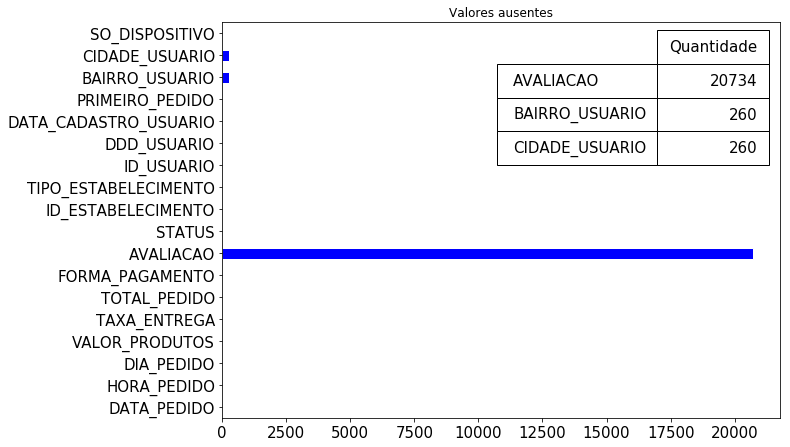

In [8]:
#Gráfico que exibe a quantidade valores ausentes 
#para cada atributo da base

fontsize = 15
font_size = 15
df = pd.DataFrame(base.apply(lambda x: 
                             sum(x.isnull()),axis=0))
df.columns = ['Quantidade']
ax8 =  plt.subplot2grid((2, 2), (0, 0), colspan=2)
grafico = df.plot.barh(figsize=(10,16), fontsize= fontsize,   
                       ax=ax8, 
                       facecolor='blue', 
                       edgecolor='white', 
                       legend = False)
plt.title('Valores ausentes')

df = df[(df['Quantidade'] > 0)]
df
mpl_table = table(ax8, df, loc='best', rowLoc='left', colLoc = 'center')
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
mpl_table.scale(0.2,2.8)

**1.5** No gráficos de histograma, é possível através de atributos numéricos observar a distribuição na base de dados 


Text(0.5,1,'Quantidade de pedidos por usuário')

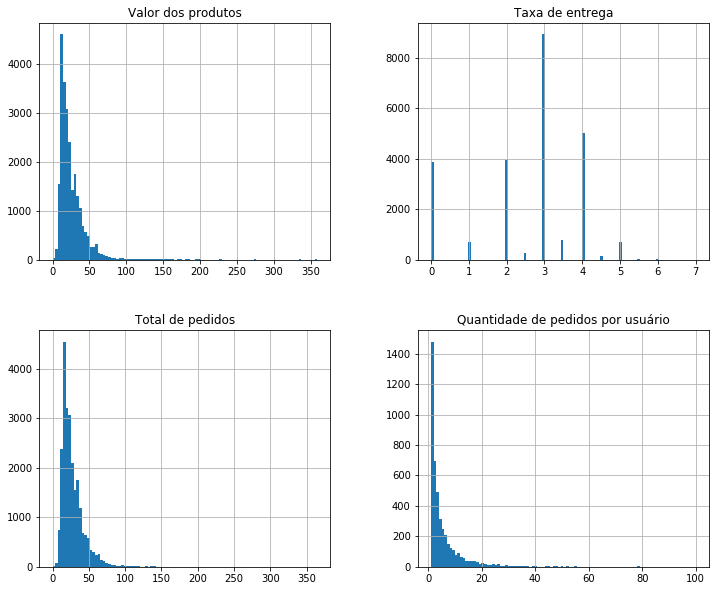

In [33]:
#Histograma dos atributos numéricos para 
#observar a distribuição na base de dados.

fontsize = 15
font_size = 15

fig = plt.figure(figsize=(12,10))
ax5 = fig.add_subplot(221)
base.hist(column='VALOR_PRODUTOS', bins=100, figsize=(20,5), ax=ax5)
plt.title('Valor dos produtos')


ax6 = fig.add_subplot(222)
base.hist(column='TAXA_ENTREGA', bins=100, figsize=(20,5),  ax=ax6)
plt.title('Taxa de entrega')


ax7 = fig.add_subplot(223)
base.hist(column='TOTAL_PEDIDO', bins=100, figsize=(20,5),   ax=ax7)
plt.title('Total de pedidos')

dff = pd.DataFrame(base.groupby('ID_USUARIO').size())
dff.columns = ['Quantidade']
dff.sort_values(by =['Quantidade'], ascending=False)
ax8 = fig.add_subplot(224)

dff.hist(column='Quantidade', bins=100, figsize=(20,5),   ax=ax8)
plt.title('Quantidade de pedidos por usuário')




In [ ]:
#base.describe()
#min(base['DATA_PEDIDO'])
#max(base['DATA_PEDIDO'])

In [27]:
# Formas de pagamentos e a respectiva quantidade,
# dado que o status do pedido é Recusado.

#Pergunta para ser respondida: Quais as formas de pagamento e a quantidade, 
# que os pedidos foram recusados?

filt = base[(base['STATUS'] == "Recusado")]
dff = pd.DataFrame(filt.groupby('FORMA_PAGAMENTO').size())
dff.columns = ['Quantidade']
dff.sort_values(by =['Quantidade'], ascending=False)



,Quantidade
ID_USUARIO,
40872,100
27784,79
10392,79
41408,78
41304,73
6856,71
264,68
37264,66
14480,65


In [13]:
# Formas de pagamentos e a respectiva quantidade,
# dado que o tipo de estabelecimento do pedido é Lanchonete.

#Pergunta para ser respondida: Quantos estabelecimentos do
# tipo lanchonete tem na base de dados?


filt = base[(base['TIPO_ESTABELECIMENTO'] == "Lanchonete")]
dff = pd.DataFrame(filt.groupby('FORMA_PAGAMENTO').size())
dff.columns = ['Quantidade']
dff.sort_values(by =['Quantidade'], ascending=False)


,Quantidade
FORMA_PAGAMENTO,
Dinheiro,5066
Cartão,2121


In [14]:
# Obter o registro em que a cidade seja Vitória da Conquista, 
# a comida é japonesa e o valor é 274.20

filt = base[(base['CIDADE_USUARIO'] == "Vitória da Conquista") 
            & (base['TIPO_ESTABELECIMENTO'] == "Comida Japonesa")
           & (base['VALOR_PRODUTOS'] == 274.20)
           ]
dff = pd.DataFrame(filt.groupby('VALOR_PRODUTOS').size())
dff.columns = ['Quantidade']
dff.sort_values(by =['Quantidade'], ascending=False)
filt

,DATA_PEDIDO,HORA_PEDIDO,DIA_PEDIDO,VALOR_PRODUTOS,TAXA_ENTREGA,TOTAL_PEDIDO,FORMA_PAGAMENTO,AVALIACAO,STATUS,ID_ESTABELECIMENTO,TIPO_ESTABELECIMENTO,ID_USUARIO,DDD_USUARIO,DATA_CADASTRO_USUARIO,PRIMEIRO_PEDIDO,BAIRRO_USUARIO,CIDADE_USUARIO,SO_DISPOSITIVO
21612,2016-08-07,19:44,Friday,274.2,3.0,277.2,Cartão,NaN,Entregue,280,Comida Japonesa,55080,77,2016-08-07,Sim,Boa Vista,Vitória da Conquista,Android


In [15]:
# Obter os valores dos produtos e a respectiva quantidade, da cidade de Vitória da
# Conquista e que o tipo de estabelecimento seja Acarajé

#Pergunta para ser respondida: Quais valores e quantos produtos 
# do respectivo valor, do tipo de estabelecimento lanchonete 
# na cidade de Vitória da conquista

filt = base[(base['CIDADE_USUARIO'] == "Vitória da Conquista") 
            & (base['TIPO_ESTABELECIMENTO'] == "Acarajé")]
dff = pd.DataFrame(filt.groupby('VALOR_PRODUTOS').size())
dff.columns = ['Quantidade']
dff.sort_values(by =['Quantidade'], ascending=False)



,Quantidade
VALOR_PRODUTOS,
37.0,11
35.0,1


In [16]:
#Obter os tipos de estabelecimento e as suas respectivas quantidades
# da cidade de Vitória da Conquista.

#Pergunta para ser respondida: Na cidade de vitória da conquista
# quais e quantos são os tipos de estabelecimentos?

filt = base[(base['CIDADE_USUARIO'] == "Vitória da Conquista")]
dff = pd.DataFrame(filt.groupby('TIPO_ESTABELECIMENTO').size())
dff.columns = ['Quantidade']
dff.sort_values(by =['Quantidade'], ascending=False)

,Quantidade
TIPO_ESTABELECIMENTO,
Lanchonete,7065
Pizzaria,3733
Marmitex,3491
Comida Natural,2128
Restaurante,1975
Comida Japonesa,1152
Pizzaria/Esfiharia,1075
Restaurante/Tapiocaria,573
Hot-Dog,450


In [17]:
#Obter as cidades do usuário e suas respectivas quantidades
# na base de dados

#Pergunta para ser respondida: Quais e quantas cidades tem na 
# base de dados?

df = pd.DataFrame(base.groupby('CIDADE_USUARIO').size())
df.columns = ['Quantidade']
df
df.sort_values(by =['Quantidade'], ascending=False)



,Quantidade
CIDADE_USUARIO,
Vitória da Conquista,23889
Ibicaraí,103
Brumado,71
Mortugaba,35
Sorocaba,1


In [18]:
#Obter as cidades do usuário e suas respectivas quantidades
# dado que o tipo de estabelecimento lanchonete.

# Pergunta para ser respondida: Em quais cidades e qual a quantidade, tem lanchonete?

filt = base[(base['TIPO_ESTABELECIMENTO'] == "Lanchonete")]
dff = pd.DataFrame(filt.groupby('CIDADE_USUARIO').size())
dff.columns = ['Quantidade']
dff.sort_values(by =['Quantidade'], ascending=False)

,Quantidade
CIDADE_USUARIO,
Vitória da Conquista,7065
Ibicaraí,62


In [19]:
#Pergunta para ser respondida: Quais e quantos são os valores de
# produtos do tipo de estabelecimento lanchonete?


filt = base[(base['TIPO_ESTABELECIMENTO'] == "Lanchonete")]
dff = pd.DataFrame(filt.groupby('VALOR_PRODUTOS').size())
dff.columns = ['Quantidade']
dff.sort_values(by =['Quantidade'], ascending=False)

,Quantidade
VALOR_PRODUTOS,
13.00,353
20.90,327
11.00,315
15.00,260
22.00,240
19.00,220
18.00,209
12.00,192
14.00,190


**1.3** Verificamos que pela quantidade de pedidos realizados sobre o estabelecimento, lanchonete recebeu a maior parte das vendas mesmo sendo bastante distribuído os dados referentes aos outros estabelecimentos.



In [20]:
#Pergunta para ser respondida: Quais e quantos tipos
# de estabelecimentos tem na base de dados?

df = pd.DataFrame(base.groupby('TIPO_ESTABELECIMENTO').size())
df.columns = ['Quantidade']
df
df.sort_values(by =['Quantidade'], ascending=False)


,Quantidade
TIPO_ESTABELECIMENTO,
Lanchonete,7187
Pizzaria,3763
Marmitex,3597
Comida Natural,2135
Restaurante,2006
Comida Japonesa,1167
Pizzaria/Esfiharia,1103
Restaurante/Tapiocaria,584
Pizzaria/Lanchonete,455


**1.4** Foi verificado também pelo gráfico que a maioria dos pedidos entregues foram pagos pela forma de pagamento em dinheiro. Mesmo assim, vimos que poucos pedidos foram recusados.

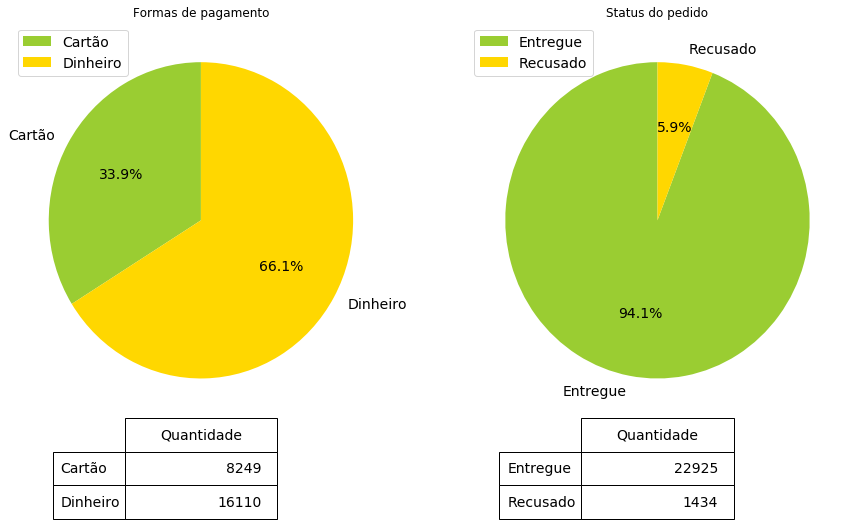

In [21]:
plt.rcParams.update({'text.color': 'black'})
fontsize = 14
font_size=14
d1 = pd.DataFrame(base.groupby('FORMA_PAGAMENTO').size())
d1.columns = ['Quantidade']
fig = plt.figure(figsize=(15,16))


colors = ['yellowgreen', 'gold']
# plot chart
ax1 = fig.add_subplot(221)
grafico = d1.plot(kind = 'pie', autopct='%1.1f%%', 
                  startangle=90, shadow=False,
                 figsize=(5,5), fontsize= fontsize, 
                  colors = colors, 
                  legend = True,   ax=ax1, subplots=True)
plt.title('Formas de pagamento')
plt.ylabel('')
plt.legend(loc=2, prop={'size': fontsize})

d2 = pd.DataFrame(base.groupby('STATUS').size())
d2.columns = ['Quantidade']

ax2 = fig.add_subplot(222)
grafico = d2.plot(kind = 'pie',autopct='%1.1f%%', 
                  startangle=90, shadow=False, 
                   figsize=(5,5),fontsize=fontsize, 
                  colors = colors, 
                  legend = True,   ax=ax2, subplots=True)
plt.title('Status do pedido')
plt.ylabel('')
plt.legend(loc=2, prop={'size': fontsize})

#ax3 = fig.add_subplot(223)

#ax3.axis('off')
mpl_table = table(ax2, d2, loc='bottom', 
                  rowLoc='left', 
                  colLoc = 'center')
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
mpl_table.scale(0.4,2.8)

#ax4 = fig.add_subplot(224)

#ax4.axis('off')
mpl_table = table(ax1, d1, loc='bottom', 
                  rowLoc='left', 
                  colLoc = 'center')
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
mpl_table.scale(0.4,2.8)



**1.2** Neste gráfico de Boxplot foi possível verificar alguns atributos e a sua distribuição no caso do “valor dos produtos”, “taxa de entrega” e do “total de pedidos”,  em que vimos a grande variedade entres as amostras coletadas, os valores discrepantes e a divisão dos dados quanto aos atributos mencionados.


Text(0.5,1,'Total de pedidos')

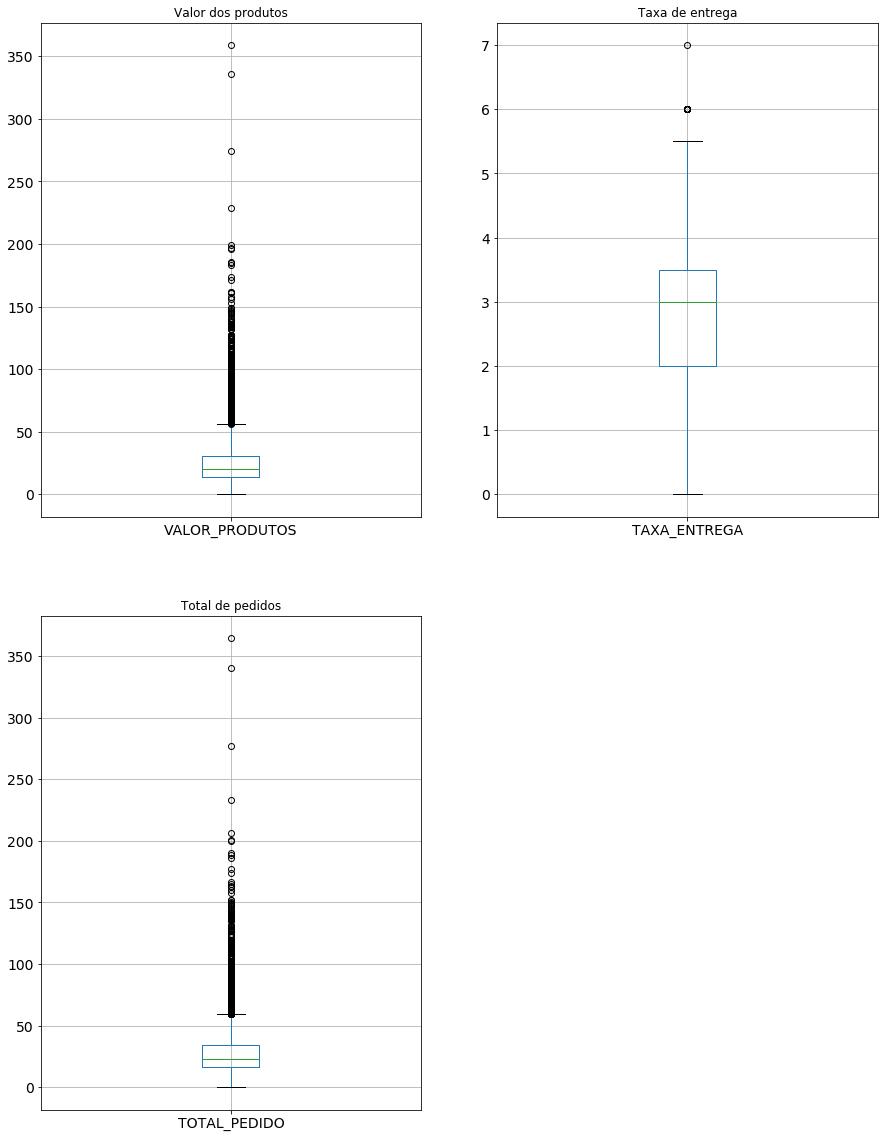

In [22]:
#Boxplot para verificar os valores discrepantes e a divisão dos dados
# do atributos mencionados

fig = plt.figure(figsize=(15,20))
ax5 = fig.add_subplot(221)
grafico = base[['VALOR_PRODUTOS']].boxplot(figsize=(20,5), 
                                           fontsize= fontsize,   ax=ax5)
plt.title('Valor dos produtos')


ax6 = fig.add_subplot(222)
grafico = base[['TAXA_ENTREGA']].boxplot(figsize=(20,5), 
                                         fontsize= fontsize,   ax=ax6)
plt.title('Taxa de entrega')


ax7 = fig.add_subplot(223)
grafico = base[['TOTAL_PEDIDO']].boxplot(figsize=(20,5), 
                                         fontsize= fontsize,   ax=ax7)
plt.title('Total de pedidos')



Text(0.5,1,'Perído de pedidos')

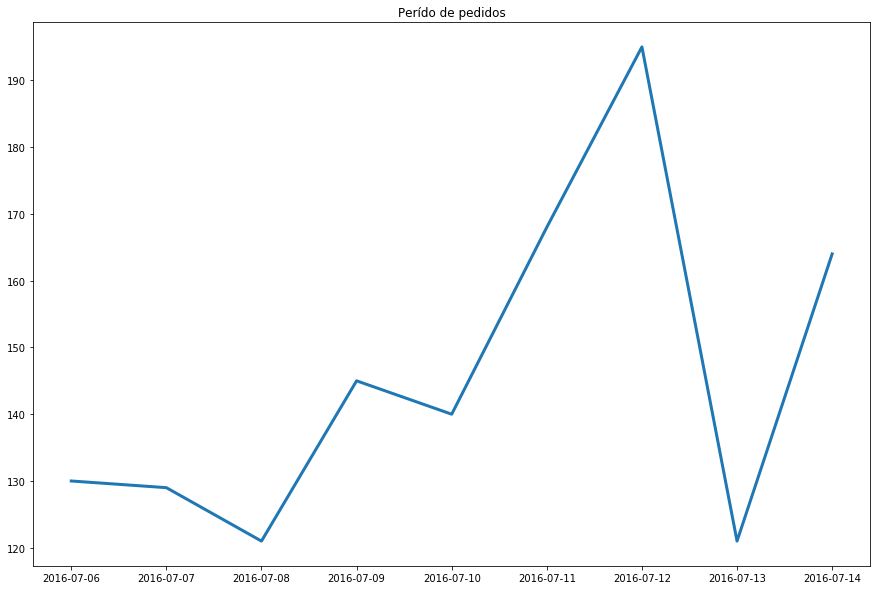

In [23]:
#Vendas pelo perído mencionado

#plt.rcParams.update({'font.size': 10})


fig = plt.figure(figsize=(15,10))
#ax = fig.add_subplot(111)
filtrado = base[(base['DATA_PEDIDO'] > '2016-07-05') 
                & (base['DATA_PEDIDO'] < '2016-07-15')]
time = pd.DataFrame(filtrado.groupby('DATA_PEDIDO').size())
time.columns = ['Quantidade']
grafico = plt.plot(time , linewidth=3, markersize=20) 
plt.title('Perído de pedidos')

#time



In [24]:
#Verificando se a Data do pedido informada na base,
# confere com o Dia do pedido informado.

#Pergunta para ser respondida: O dia do pedido confere com a data do pedido informada?

df1 = pd.DataFrame(base['DATA_PEDIDO'])
df1.columns = ['Data do pedido']

df2 = pd.DataFrame(base['DIA_PEDIDO'])
df2.columns = ['Dia do pedido (Base de dados)']

df3 = pd.DataFrame(df1.apply(lambda x: 
                             datetime.datetime
                             .strptime(x['Data do pedido'],'%Y-%m-%d')
                             .strftime('%A'), axis=1))
df3.columns = ['Dia do pedido (Verificado)']
df1 = df1.join(df2)
df1 = df1.join(df3)
df1.head(10)

,Data do pedido,Dia do pedido (Base de dados),Dia do pedido (Verificado)
0,2016-07-05,Sunday,Tuesday
1,2016-07-05,Sunday,Tuesday
2,2016-07-05,Sunday,Tuesday
3,2016-07-06,Monday,Wednesday
4,2016-07-07,Tuesday,Thursday
5,2016-07-08,Wednesday,Friday
6,2016-07-09,Thursday,Saturday
7,2016-07-10,Friday,Sunday
8,2016-07-12,Sunday,Tuesday
9,2016-07-15,Wednesday,Friday


In [25]:
#Pergunta para ser respondida: Todos os registros estão 
# com o dia do pedido informado "errado"?
filtrado = df1[(df1['Dia do pedido (Base de dados)']
                == df1['Dia do pedido (Verificado)'])]
len(filtrado)

0

In [26]:
# Quantos pedidos receberam avaliação?
filtrado = base[(base['AVALIACAO'].isnull() == False )]
len(filtrado)

3625